In [1]:
#this model detects lung cancer data based on data
#importing the libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
#load the dataset
LC=pd.read_csv('LC.csv')

In [3]:
#displaying the fist 7 rows of the dataset
LC.head(7)

,id,diagnosis,TP53,PTEN,EGFR,KRAS,FGFR1,ALK,METex14,MET,BRAF,PIK3CA,ROS1,HER2,RET
0,1001,B,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1002,B,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1003,B,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1004,B,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1005,M,1,0,0,0,1,0,0,0,0,0,0,0,0
5,1006,B,0,0,0,0,0,0,0,0,0,0,0,1,0
6,1007,B,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
#counting how many rows and colums are there in our dataset
LC.shape

(128, 15)

In [5]:
#count the number of empty values(Nan,nan,NA) in each column to check if any value is not at that place
LC.isna().sum()

id           0
diagnosis    0
TP53         0
PTEN         0
EGFR         0
KRAS         0
FGFR1        0
ALK          0
METex14      0
MET          0
BRAF         0
PIK3CA       0
ROS1         0
HER2         0
RET          0
dtype: int64

In [6]:
#if there is any column with missing values then we can drop that column by using the following command
#dataset_name.dropna(axis=column_number_of_feature)

In [7]:
#getting the count of the number of rows and columns after updating the rows and columns
LC.shape

(128, 15)

In [8]:
#Getting the count of number of Malignant(M) and Benign(B) Tumour
LC['diagnosis'].value_counts()

M    92
B    36
Name: diagnosis, dtype: int64

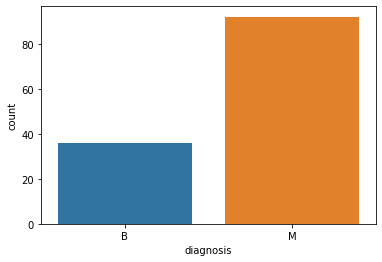

In [9]:
#visualize the count(graphical representation of Malignant and Benign)
sns.countplot(LC['diagnosis'],label="Count")

In [10]:
#looking at the datatypes to see which columns needs to be encoded(tranformed into a number value) 
LC.dtypes

id            int64
diagnosis    object
TP53          int64
PTEN          int64
EGFR          int64
KRAS          int64
FGFR1         int64
ALK           int64
METex14       int64
MET           int64
BRAF          int64
PIK3CA        int64
ROS1          int64
HER2          int64
RET           int64
dtype: object

In [11]:
#Encoding the categorical data values i.e. converting Malignant into 1 and Benign into 0
#le is the object for the label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
LC.iloc[:,1] = le.fit_transform(LC.iloc[:,1].values)
LC.iloc[:,1]          #it will show the updated values of the column
#BC.iloc[:,1].values  #it will show the original value of the column

0      0
1      0
2      0
3      0
4      1
      ..
123    1
124    1
125    1
126    1
127    1
Name: diagnosis, Length: 128, dtype: int32

In [12]:
#printing the first 5 rows of  our dataset to see the cleaner data with diagnosis value changed 
LC.head(5)

,id,diagnosis,TP53,PTEN,EGFR,KRAS,FGFR1,ALK,METex14,MET,BRAF,PIK3CA,ROS1,HER2,RET
0,1001,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1002,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1003,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1004,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1005,1,1,0,0,0,1,0,0,0,0,0,0,0,0


In [13]:
#getting the correlation of the columns to see how one column can make an influence on the other column
LC.iloc[:,1:12].corr()

,diagnosis,TP53,PTEN,EGFR,KRAS,FGFR1,ALK,METex14,MET,BRAF,PIK3CA
diagnosis,1.000000,0.451781,0.051555,0.205849,0.187579,0.246941,0.036105,-0.053838,0.074035,-0.053838,-0.190104
TP53,0.451781,1.000000,-0.268291,0.114539,0.050921,0.000000,0.030557,0.129099,0.103081,-0.064550,-0.221766
PTEN,0.051555,-0.268291,1.000000,0.154165,0.042592,0.151510,0.008198,-0.093722,-0.069953,-0.093722,-0.043165
EGFR,0.205849,0.114539,0.154165,1.000000,-0.096373,0.045765,-0.010500,0.080272,-0.033171,-0.054923,-0.085879
KRAS,0.187579,0.050921,0.042592,-0.096373,1.000000,0.142422,0.083503,-0.100799,-0.009915,-0.100799,0.094104
FGFR1,0.246941,0.000000,0.151510,0.045765,0.142422,1.000000,0.076225,-0.058554,-0.127273,0.019518,0.061468
ALK,0.036105,0.030557,0.008198,-0.010500,0.083503,0.076225,1.000000,-0.071007,-0.066146,-0.071007,-0.060988
METex14,-0.053838,0.129099,-0.093722,0.080272,-0.100799,-0.058554,-0.071007,1.000000,-0.062103,0.066667,-0.057260
MET,0.074035,0.103081,-0.069953,-0.033171,-0.009915,-0.127273,-0.066146,-0.062103,1.000000,-0.062103,-0.053340
BRAF,-0.053838,-0.064550,-0.093722,-0.054923,-0.100799,0.019518,-0.071007,0.066667,-0.062103,1.000000,0.095433


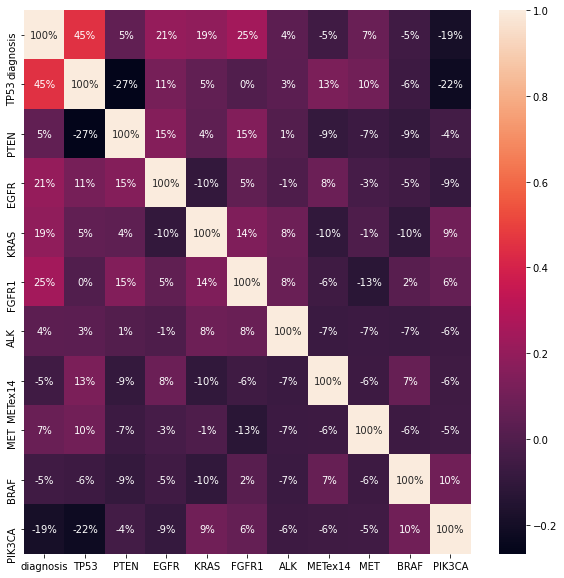

In [14]:
#visualizing the correletaion between the different columns means how much of a column is making an influence on another column
#just the visual representation of correlation of the above command 
plt.figure(figsize=(10,10))
sns.heatmap(LC.iloc[:,1:12].corr(), annot=True , fmt='.0%')

#figsize is used to make the size of table bigger to see the values clearly
#annot is for the values(in decimals) shown in each cell colour 
#fmt is used for to change the value of annot into percentages 

In [15]:
# split the dataset into independent(X) terms and dependent(Y) terms
#X includes the independent columns which do not include the diagnosis column
#Y includes the diagnosis column as it is dependent on other columns
# type(LC) shows that our dataset is a panda dataframe

X = LC.iloc[:,2:31].values # contain all of the rows of data
Y = LC.iloc[:,1].values    #

type(LC) # dataframe type
#type(X) #check the datatype of the parameters

pandas.core.frame.DataFrame

In [16]:
#splitting the data into 75% training and 25% testing


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)



In [17]:
#Feature scaling(scaling the data)
#Feature Scaling is used to make(scale) the complete data within a specific range(like 0 to 100 or 0 to 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)     # transforming our training data(features)
X_test = sc.transform(X_test)           #transforming our testing data(independent data)

#X_test
#X_train
#we can check our testing and training data by typing X_test OR X_training 

In [18]:
# Creating a function for the models to detect cancer
def models(X_train,Y_train):
  
  #fit is used to train the data
  #Using Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)   
  
  #Using KNeighborsClassifier 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC linear
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0) 
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  #score is used to calculate the accuracy
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [19]:
#Getting  the output from all of the models with their accuracy on TRAINING DATA
model = models(X_train, Y_train)


[0]Logistic Regression Training Accuracy: 0.8229166666666666
[1]K Nearest Neighbor Training Accuracy: 0.8854166666666666
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.875
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9166666666666666
[4]Gaussian Naive Bayes Training Accuracy: 0.8125
[5]Decision Tree Classifier Training Accuracy: 0.9270833333333334
[6]Random Forest Classifier Training Accuracy: 0.9166666666666666


In [20]:
#Testing model accuracy on TEST DATA by CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
 print('Model', i)
 cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
 TN = cm[0][0]
 TP = cm[1][1]
 FN = cm[1][0]
 FP = cm[0][1]
 print(cm)
 print('Model accuracy=',(TP + TN) / (TP + TN + FN + FP))# testing testing data accuracy
 print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
 print()# Print a new line

Model 0
[[ 2  4]
 [ 4 22]]
Model accuracy= 0.75
Model[0] Testing Accuracy = "0.75!"

Model 1
[[ 4  2]
 [ 4 22]]
Model accuracy= 0.8125
Model[1] Testing Accuracy = "0.8125!"

Model 2
[[ 3  3]
 [ 5 21]]
Model accuracy= 0.75
Model[2] Testing Accuracy = "0.75!"

Model 3
[[ 3  3]
 [ 3 23]]
Model accuracy= 0.8125
Model[3] Testing Accuracy = "0.8125!"

Model 4
[[ 2  4]
 [ 5 21]]
Model accuracy= 0.71875
Model[4] Testing Accuracy = "0.71875!"

Model 5
[[ 5  1]
 [ 5 21]]
Model accuracy= 0.8125
Model[5] Testing Accuracy = "0.8125!"

Model 6
[[ 4  2]
 [ 3 23]]
Model accuracy= 0.84375
Model[6] Testing Accuracy = "0.84375!"



In [21]:
#Print Prediction of Random Forest Classifier model
for i in range(len(model)):
 print('Model Number', i)
 print()
 print('Predicted data by the model')
 pred = model[i].predict(X_test)
 print(pred)

#predict means that the algorithm will classify that the patient will have cancer or not
#Print a space
 print()

#Print the actual values
 print('Real data')
 print(Y_test)
 print()
 print()


Model Number 0

Predicted data by the model
[1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1]

Real data
[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1]


Model Number 1

Predicted data by the model
[0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1]

Real data
[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1]


Model Number 2

Predicted data by the model
[0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1]

Real data
[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1]


Model Number 3

Predicted data by the model
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1]

Real data
[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1]


Model Number 4

Predicted data by the model
[1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]

Real data
[0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1]


Model Number 5

Predicted data by the model
[0 1 1 0 0 

In [22]:
print("THANK YOU")

THANK YOU
